<a href="https://colab.research.google.com/github/SaniyaBubere/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   -**Credit Card Default Prediction** 



##### **Project Type**    - Classification Supervised
##### **Contribution**    - Team
##### **Team Member 1 - Saniya Bubere**
##### **Team Member 2 -Rahul Jadhav**
##### **Team Member 3 -Rupali Dawkore**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The problem statement for credit card default prediction is to develop a model that accurately predicts the likelihood of a credit card holder defaulting on their debt payment in the near future. The model should take into account various factors such as the cardholder's credit history and other relevant financial information. The goal is to minimize false negatives (predicting a non-default when the cardholder actually defaults) and false positives (predicting a default when the cardholder is able to repay their debt) while maximizing the overall accuracy of the prediction.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for 

one month, 2=payment delay for two months,8=payment delay for eight months,

 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

### Import Libraries

In [197]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# #loading Dataset
# df=pd.read_excel("/content/drive/MyDrive/CAPSTONE PROJECT 3/default of credit card clients.xls")
df = pd.read_excel("/content/drive/MyDrive/default of credit card clients.xls", skiprows=[0], header=None)

### Dataset First View

In [90]:
# Dataset First Look
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [91]:
# Get the number of rows and columns
rows, columns = df.shape

In [92]:
# Print the number of rows and columns
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  30001
Number of columns:  25


We have 30001 rows and 25 columns

### Dataset Information

In [93]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30001 non-null  object
 1   1       30001 non-null  object
 2   2       30001 non-null  object
 3   3       30001 non-null  object
 4   4       30001 non-null  object
 5   5       30001 non-null  object
 6   6       30001 non-null  object
 7   7       30001 non-null  object
 8   8       30001 non-null  object
 9   9       30001 non-null  object
 10  10      30001 non-null  object
 11  11      30001 non-null  object
 12  12      30001 non-null  object
 13  13      30001 non-null  object
 14  14      30001 non-null  object
 15  15      30001 non-null  object
 16  16      30001 non-null  object
 17  17      30001 non-null  object
 18  18      30001 non-null  object
 19  19      30001 non-null  object
 20  20      30001 non-null  object
 21  21      30001 non-null  object
 22  22      30001 non-null

All the columns are in Object Dtype

#### Duplicate Values

In [94]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24


No Duplicates Found

### What did you know about your dataset?

The data provided is a sample of a credit card default dataset. The first row provides the header information, with each column indicating a feature of the credit card holder. The first column (ID) is the unique identifier for each record. The second column (LIMIT_BAL) indicates the credit limit of the credit card. The third column (SEX) indicates the gender of the cardholder. The fourth column (EDUCATION) indicates the level of education of the cardholder. The fifth column (MARRIAGE) indicates the marital status of the cardholder. The sixth column (AGE) indicates the age of the cardholder. The seventh to sixteenth columns (PAY_0 to PAY_9) indicate the repayment status for the last ten months. The remaining columns (BILL_AMT1 to BILL_AMT6, PAY_AMT1 to PAY_AMT6) indicate the amount of bill statement and amount paid in the last six months. The final column (default payment next month) is the target variable and indicates whether the cardholder defaulted on their payment in the next month (1) or not (0).

## ***2. Understanding Your Variables***

In [95]:
# Dataset Columns
df.rename(columns=df.iloc[0]).drop(df.index[0],inplace=True)


Removing Header of the Dataset as its not use full 

In [96]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [97]:

# Set the second row as the header
df.columns = df.iloc[0]

In [98]:

# Drop the second row (previous header row)
df = df.drop(df.index[0])

In [99]:

# Reset the index
df = df.reset_index(drop=True)

In [100]:
#Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [101]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

### Variables Description 

ID: A unique identifier for each credit card holder.

LIMIT_BAL: The credit limit assigned to each card holder.

SEX: The gender of the card holder, encoded as 1 for male and 2 for female.

EDUCATION: The education level of the card holder, encoded as 1 for graduate school, 2 for university, 3 for high school, 4 for others, and 5 for unknown.

MARRIAGE: The marital status of the card holder, encoded as 0 for unknown, 1 for married, 2 for single, and 3 for others.

AGE: The age of the card holder.

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6: The payment status in September, August, July, June, May, and April (respectively) of the year prior to the data collection, encoded as -1 for payment duly received, 1 for payment delay for one month, 2 for payment delay for two months, and so on.

BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, and BILL_AMT6: The amount of bill statement in September, August, July, June, May, and April (respectively) of the year prior to the data collection.

PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, and PAY_AMT6: The amount of payment in September, August, July, June, May, and April (respectively) of the year prior to the data collection.

default payment next month: A binary variable indicating whether the card holder defaulted on their payment in the next month, encoded as 1 for default and 0 for not default.

& There is No null Value in Dataset


### Check Unique Values for each variable.

In [103]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [104]:
def get_all_unique_values(df):
    for col in df.columns:
        print(f"Unique values in column '{col}':")
        print(df[col].unique())
        print()

In [105]:
# Get and print all unique values
get_all_unique_values(df)

Unique values in column 'ID':
[1 2 3 ... 29998 29999 30000]

Unique values in column 'LIMIT_BAL':
[20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]

Unique values in column 'SEX':
[2 1]

Unique values in column 'EDUCATION':
[2 1 3 5 4 6 0]

Unique values in column 'MARRIAGE':
[1 2 3 0]

Unique values in column 'AGE':
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68

## 3. ***Data Wrangling***

### Data Wrangling Code

Some of the columns didn’t make sense to me, so I decided to rename them into more understandable terms.

In [106]:
from termcolor import colored

In [107]:
# renaming status,bill amount & payment amount columns
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'
,'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'
,'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

print(colored("\nTHE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...", color = "green", attrs = ["bold", "dark"]))


THE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...


In [108]:
# renamin target column
df.rename(columns={'default payment next month':'default'},inplace=True)

In [109]:
# after renamed look of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [110]:
#Rearranging the columns
df=df.loc[:,['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_APR','PAY_MAY','PAY_JUN', 'PAY_JUL','PAY_AUG','PAY_SEPT','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT','PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT','default']]

In [111]:
# Looking for each rearranged columns
df[['PAY_APR','PAY_MAY','PAY_JUN', 'PAY_JUL','PAY_AUG','PAY_SEPT','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT','PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT','default']]

,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,PAY_SEPT,BILL_AMT_APR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AUG,PAY_AMT_SEPT,default
0,-2,-2,-1,-1,2,2,0,0,0,689,3102,3913,0,0,0,0,689,0,1
1,2,0,0,0,2,-1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000,0,1
2,0,0,0,0,0,0,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
3,0,0,0,0,0,0,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
4,0,0,0,-1,0,-1,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,15980,31237,88004,208365,192815,188948,1000,5000,3047,5003,20000,8500,0
29996,0,0,-1,-1,-1,-1,0,5190,8979,3502,1828,1683,0,0,129,8998,3526,1837,0
29997,0,0,-1,2,3,4,19357,20582,20878,2758,3356,3565,3100,2000,4200,22000,0,0,1
29998,-1,0,0,0,-1,1,48944,11855,52774,76304,78379,-1645,1804,52964,1926,1178,3409,85900,1


Grouped unknown EDUCATION categories (0,5,6) and re-assigned them to 4 (others)


In [112]:
#Replacing the value that is unknown to others category
df["EDUCATION"].replace({0:4,5:4,6:4},inplace=True)

In [113]:
#looking for changes
df.EDUCATION.unique()

array([2, 1, 3, 4])

Grouped unknown MARRIAGE categories (0) and re-assigned them to 3 (others)

In [114]:
#Replacing the value that is unknown to others category

df["MARRIAGE"].replace({0:3},inplace=True)

In [115]:
#looking for changes
df.MARRIAGE.unique()

array([1, 2, 3])

converting all columns to int data type


In [116]:
#converting all columns to int data type
df = df.apply(pd.to_numeric, errors='coerce')

The pd.to_numeric method is applied to each column using the apply method

In [117]:
#checking changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_APR        30000 non-null  int64
 7   PAY_MAY        30000 non-null  int64
 8   PAY_JUN        30000 non-null  int64
 9   PAY_JUL        30000 non-null  int64
 10  PAY_AUG        30000 non-null  int64
 11  PAY_SEPT       30000 non-null  int64
 12  BILL_AMT_APR   30000 non-null  int64
 13  BILL_AMT_MAY   30000 non-null  int64
 14  BILL_AMT_JUN   30000 non-null  int64
 15  BILL_AMT_JUL   30000 non-null  int64
 16  BILL_AMT_AUG   30000 non-null  int64
 17  BILL_AMT_SEPT  30000 non-null  int64
 18  PAY_AMT_APR    30000 non-null  int64
 19  PAY_

### What all manipulations have you done and insights you found?
I have Changed the Name of a columns with its meaningfull name 

Grouped unknown EDUCATIONcategories (0,5,6) and re-assigned them to 4 (others)

Grouped unknown MARRIAGEcategories (0) and re-assigned them to 3 (others)

The pd.to_numeric method is applied to each column using the apply method to change the data type of columns to int



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **UNIVARIANT ANALYSIS**

In [118]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_APR',
       'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT', 'BILL_AMT_APR',
       'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG',
       'BILL_AMT_SEPT', 'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 'default'],
      dtype='object', name=0)

# **Distribution of Target column on the basis of Percentage**

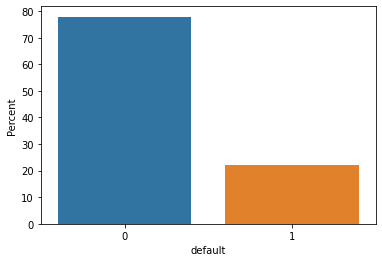

In [119]:
# x=(df["default"])
# percentage = lambda i: len(i) / float(len(x)) * 100

# ax = sns.barplot(x=x, y=x,  estimator=percentage)
# ax.set(ylabel="Percent")
# plt.show()

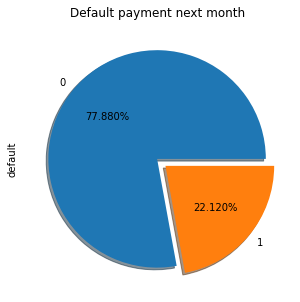

In [141]:
plt.figure(figsize = [10, 5])
plt.title("Default payment next month")
df["default"].value_counts().plot.pie(explode = [0, 0.10], autopct = '%1.3f%%', shadow = True)

##### 1. Why did you pick the specific chart?

Bar charts are typically used to compare the values of categorical data and show the distribution of data over time. They are good for visualizing data for a small number of categories and allow for easy comparison of values.

##### 2. What is/are the insight(s) found from the chart?

We can say that Number of not default cardholders have higher % then Defaulters

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is the positive impact that less number of cardholders are defaulters

# **Age Group Distribution**

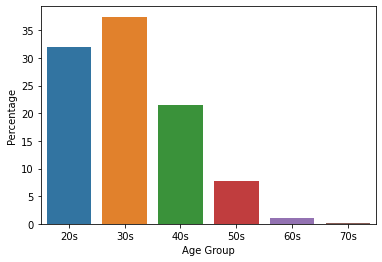

In [120]:
ages=(df['AGE'])
bins = [20, 30, 40, 50, 60, 70, 80]
group_names = ['20s', '30s', '40s', '50s', '60s', '70s']

ages_df = pd.DataFrame({'ages': ages})
ages_df['age_group'] = pd.cut(ages_df['ages'], bins, labels=group_names, right=False)

age_group_counts = ages_df['age_group'].value_counts()

total_count = len(ages)
percentage = (age_group_counts / total_count) * 100

sns.barplot(x=age_group_counts.index, y=percentage)
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.show()


This is a bar plot of the age groups of individuals who possess credit cards. The x-axis represents the age groups, and the y-axis represents the percentage of individuals in each age group who possess credit cards.

##### 1. Why did you pick the specific chart?

This is a bar plot of the age groups of individuals who possess credit cards. The x-axis represents the age groups, and the y-axis represents the percentage of individuals in each age group who possess credit cards.

##### 2. What is/are the insight(s) found from the chart?

Most of the People who are in the age group 30's have higher % of using Credit Card and 70's group have minimum cardholders

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this say that most of the people who's age is between 20-30 are using credit card 

# **BIVARIATE**

# **Categorical Columns Insights**

In [147]:
#Creating new Dataframe for categorical variables
df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE']].copy()
df_cat['default'] = df['default']

#replace all values in categorical varibles with original names
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4: 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


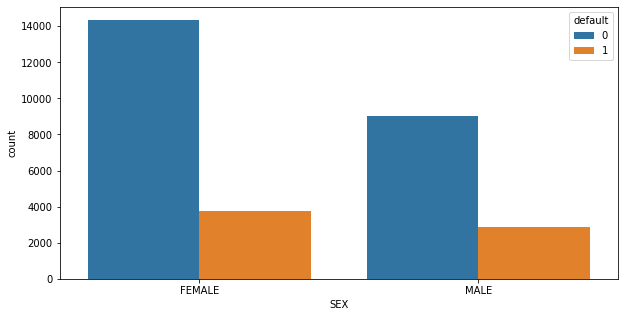

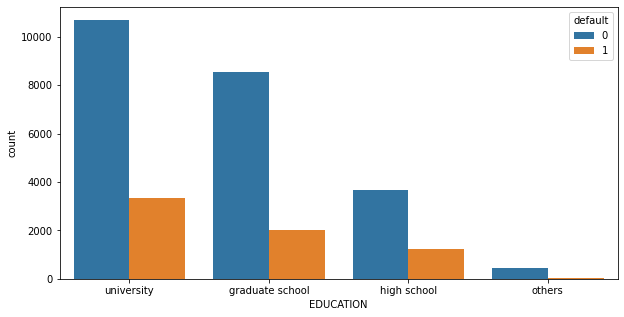

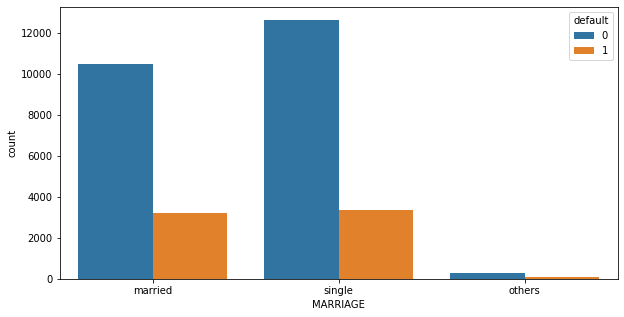

In [148]:
# printing the categorical feature value counts
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default', data = df_cat)

##### 1. Why did you pick the specific chart?

Bar charts are typically used to compare the values of categorical data and show the distribution of data over time. They are good for visualizing data for a small number of categories and allow for easy comparison of values.

##### 2. What is/are the insight(s) found from the chart?

1: From the 1st chart we can observe that female are more cardholders then male
And surprisingly they are more defaulter then male 

2: From education chart we can say that the person who have higher education have higher default count then others

3: From last chart we can observe that singles & married both have same count for default

##### 3. Will the gained insights help creating a positive business impact? 

1: From this we get to know that we can give more credit card to Males as they are less defaulters then females


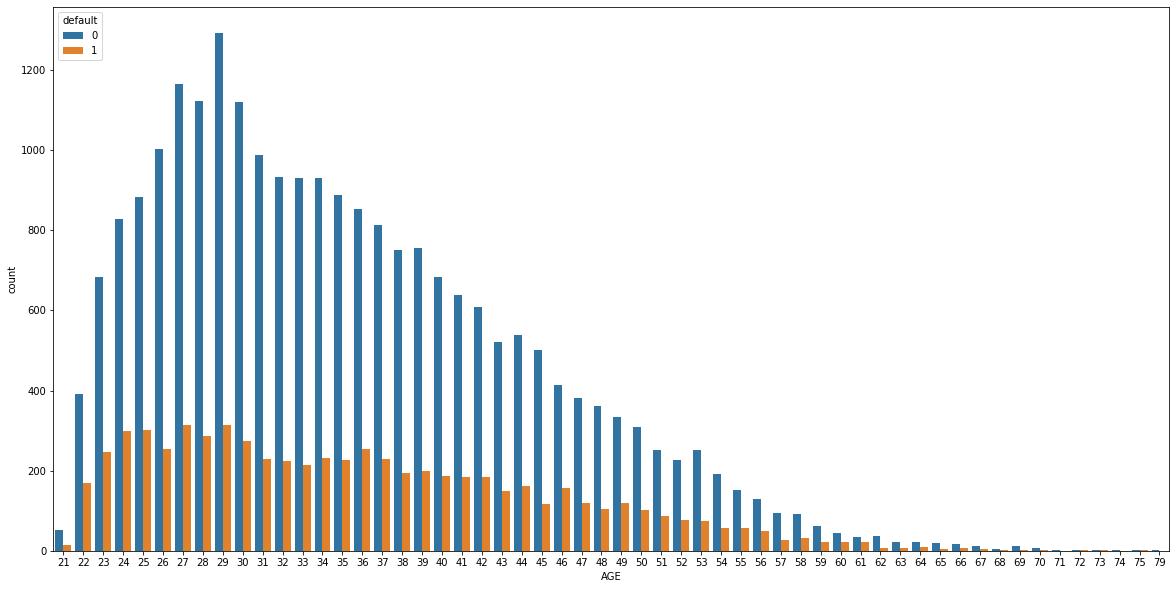

In [182]:
#Age VS default
plt.figure(figsize=(20,10))
sns.countplot(x='AGE',hue='default',data=df);

##### 1. Why did you pick the specific chart?

Bar Chart allows for a quick visual comparison of the data.

##### 2. What is/are the insight(s) found from the chart?

Age between 24 to 30 are more defaulters 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe that Age between 24 to 30 have more defaulter and most of the Cardholders are not defaulters

Defaulters with respect to Pay_Sept

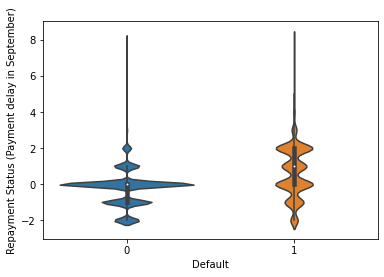

In [126]:
sns.violinplot(x='default', y='PAY_SEPT', data=df)
plt.xlabel('Default')
plt.ylabel('Repayment Status (Payment delay in September)')
plt.show()


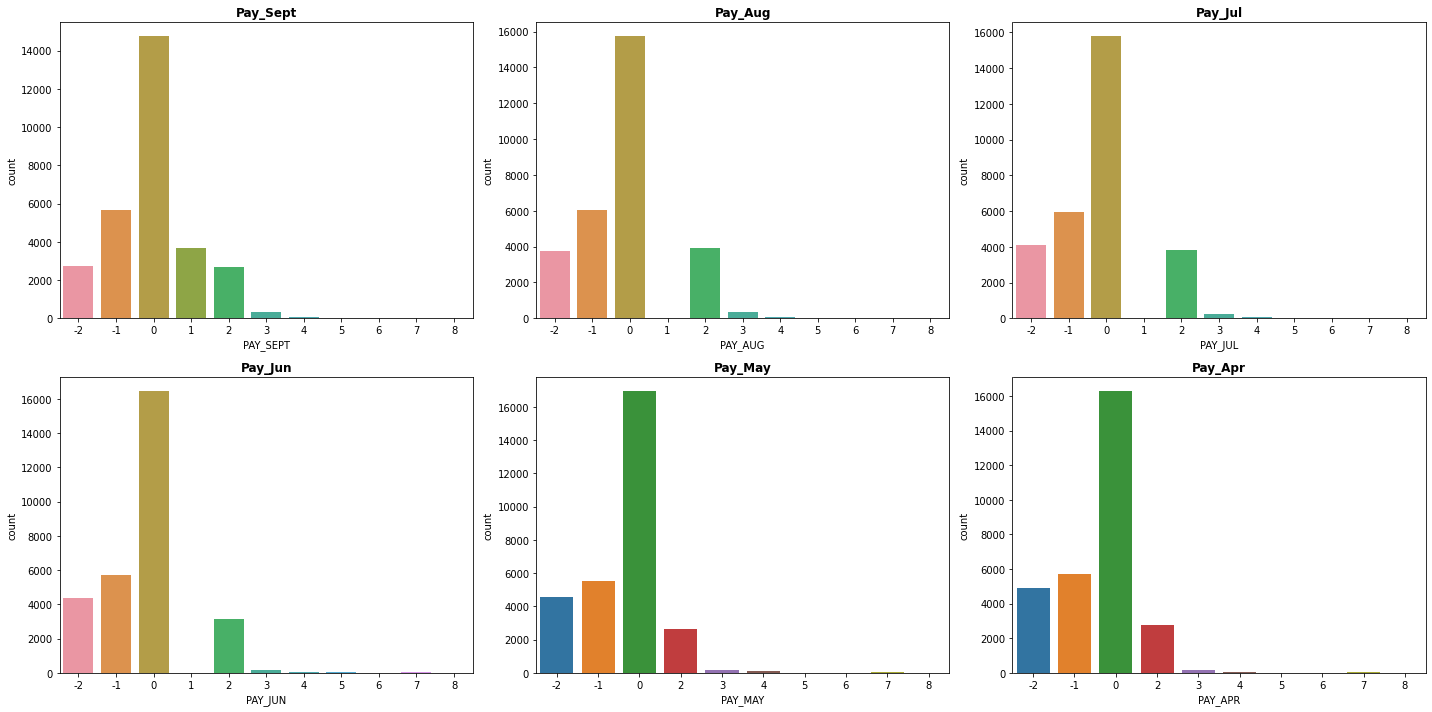

In [198]:
plt.figure(figsize=(20,10))
#Plotting payment staus using countplot
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for num,column in enumerate(pay_col):
  plt.subplot(2,3,num+1)
  sns.countplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# **MULTIVARIANT**

In [165]:
#Creating new variables
var = df[['SEX', 'LIMIT_BAL','AGE']].copy()
var['default'] = df['default']

#replace values in varibles with original names
var.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}},inplace = True)

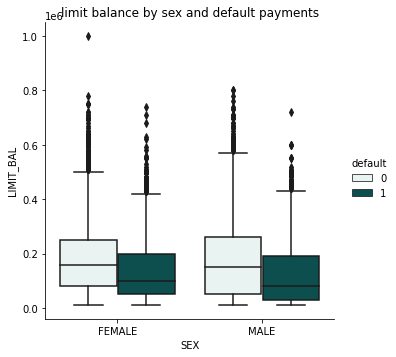

In [166]:
#taking catplot for the given variable
sns.catplot(x = "SEX",
            y = "LIMIT_BAL",
            kind = "box",
            hue = "default",
            color = '#0c4f4e',
            data = var, saturation = 2,
            margin_titles = True).set(title = "limit balance by sex and default payments");

##### 1. Why did you pick the specific chart?

Catplot is used in Seaborn to create categorical plots, which are plots that show the relationship between a categorical variable i.e SEX and one continuous variables i.e LIMIT_BAL. These plots are useful for visualizing the distribution and spread of data.

##### 2. What is/are the insight(s) found from the chart?

There are more Female defaulters than men ,female have more ouliers in Limit Balance Variable

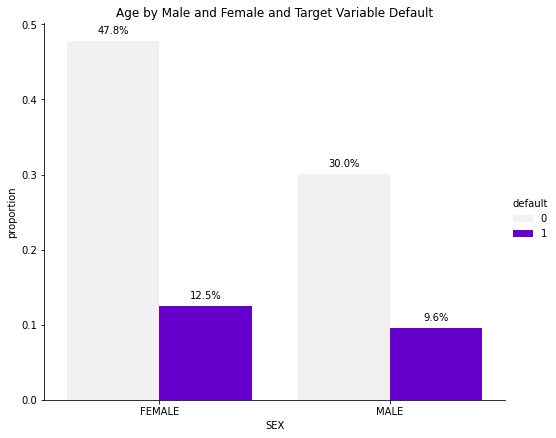

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the proportions for each bar
prop_df = var.groupby(["SEX", "default"])["AGE"].count() / len(var)
prop_df = prop_df.reset_index()
prop_df = prop_df.rename(columns={"AGE": "proportion"})

# Plot the bar chart
g = sns.catplot(x="SEX", y="proportion", hue="default", kind="bar", color="#6600CC",
                data=prop_df, height=6, aspect=1.2, saturation=1)

# Add the percentage labels to the bars
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.01,
                '{:.1%}'.format(height),
                ha="center")

g.set(title = "Age by Male and Female and Target Variable Default")
plt.show()


##### 1. Why did you pick the specific chart?

Double bar charts are used to compare the distribution of a target variable across different categories. They can provide a clear and concise way to visualize the differences and similarities between the categories, making it easy to identify trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

we first calculate the proportions for each bar by grouping the data by SEX and default and then dividing the count of values in each group by the total number of values in the data. We then plot the bar chart using catplot as before, but this time using the proportions instead of the raw count.

#### Chart - 8

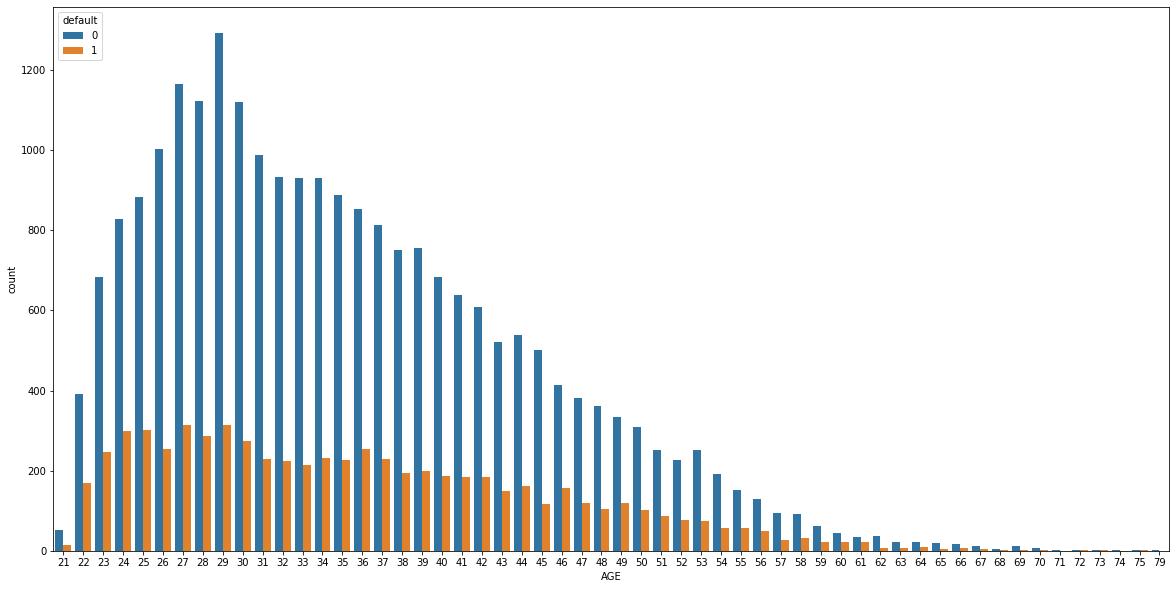

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [129]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [130]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [131]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [132]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [133]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

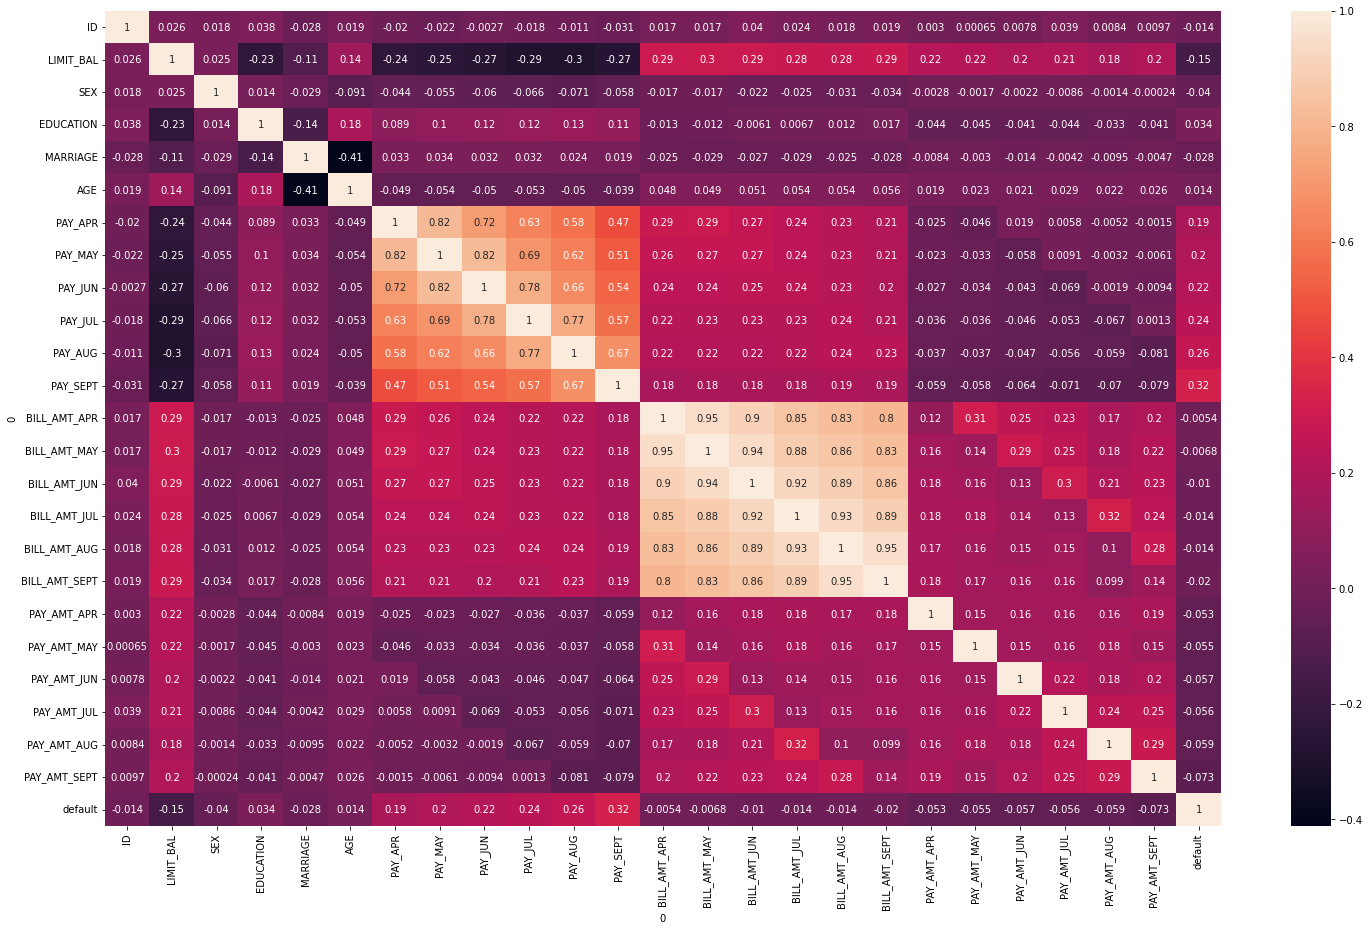

In [135]:
plt.figure(figsize = [25, 15])
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***